# pyglauber: 
## optical vs Monte Carlo (MC) Glauber Modelling of High Energy Collisions at LHC and RHIC; centrality grids; event views

In [1]:
import numpy as np, matplotlib.pyplot as plt
from pyglauber.models import OpticalModel, MonteCarloModel
from pyglauber.utils.analysis import centrality_table, centrality_table_mc
from pyglauber.utils.plotting import (
    plot_TA_map, plot_TpA_map, plot_npart_ncoll_maps,
    plot_transverse_profiles, plot_longitudinal_slice,
    centrality_grid_optical, centrality_grid_mc, plot_mc_event
)
plt.rcParams.update({'figure.figsize':(6,4),'axes.grid':True})

# p+Pb Collisions at LHC @5TeV

## Optical p+Pb @ 5TeV

In [2]:
# LHC p+Pb (Pb target, proton projectile)
opt_pPb = OpticalModel(system='pA', target='Pb', energy_GeV=5023, verbose=True)

print("σ_tot [fm^2]:", opt_pPb.sigma_tot(units='fm2'))
print("σ_tot [mb]  :", opt_pPb.sigma_tot(units='mb'))

# Use standard LHC p+Pb centrality bins
# bins = [0,10,20,30,40,50,60,70,80,90,100]
bins = [0,20,40,60,80,100]
rows_pPb_opt = centrality_table(opt_pPb, bins=bins, progress=True)
rows_pPb_opt[:2] + [rows_pPb_opt[-1]]  # peek

[INFO] Cached T_A(b) on 1200-point grid up to 19.47 fm
[INFO] Precomputed T_d^eff(d) on 1000 points up to 23.37 fm


σ_tot [fm^2]: 164.63635949072304


[INFO] Finding b-edges for [0.  0.2 0.4 0.6 0.8 1. ] bins
/home/sawin/anaconda3/envs/research/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


σ_tot [mb]  : 1646.3635949072304


100%|██████████████████████████████████████████████████████████████████████| 6/6 [01:25<00:00, 14.24s/it]


[{'cent': (0, 20),
  'b_range_fm': (0.0, 3.237451291373328),
  'b_avg_fm': 2.1583227730527144,
  'Npart_avg': 14.670420885797578,
  'Ncoll_avg': 13.670605957679731},
 {'cent': (20, 40),
  'b_range_fm': (3.237451291373328, 4.578467988530333),
  'b_avg_fm': 3.946303296454074,
  'Npart_avg': 12.179204088708952,
  'Ncoll_avg': 11.183642962954181},
 {'cent': (0, 100),
  'b_range_fm': (0.0, 9.81146535564879),
  'b_avg_fm': 4.869064795493992,
  'Npart_avg': 8.480570822985914,
  'Ncoll_avg': 7.626212879932161}]

In [6]:
b40_50 = [r for r in rows_pPb_opt if tuple(r["cent"])==(40,60)][0]["b_avg_fm"]

plot_TA_map(opt_pPb, rmax=10.0); plt.show()
plot_TpA_map(opt_pPb, b=b40_50, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_pPb, b=b40_50, rmax=10.0); plt.show()
plot_transverse_profiles(opt_pPb, b=b40_50, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_pPb, b=b40_50, x_half=10.0, z_half=10.0); plt.show()

AttributeError: 'OpticalModel' object has no attribute 'TA_xy'

### Maps & profiles

In [5]:
b50 = opt_pPb.b_at_fraction(0.5)
plot_TA_map(opt_pPb, rmax=10.0); plt.show()
plot_TpA_map(opt_pPb, b=b50, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_pPb, b=b50, rmax=10.0); plt.show()
plot_transverse_profiles(opt_pPb, b=b50, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_pPb, b=b50, x_half=10.0, z_half=10.0); plt.show()

AttributeError: 'OpticalModel' object has no attribute 'TA_xy'

## MC p+Pb @ 5TeV

In [7]:
mc_pPb = MonteCarloModel(system='pA', target='Pb', energy_GeV=5023)
res_pPb = mc_pPb.run(Nevents=12000, progress=True)
print(res_pPb.summary())
centrality_table_mc(res_pPb, bins=[0,20,40,60,80,100])

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:48<00:00, 246.99it/s]

Nevents=1683, <b>=5.445 fm, <N_part>=7.952, <N_coll>=6.952


[{'cent': (0, 20),
  'b_range_fm': (0.12740798562947267, 3.550872063793117),
  'b_avg_fm': 2.3833810837249962,
  'Npart_avg': 14.400593471810089,
  'Ncoll_avg': 13.400593471810089},
 {'cent': (20, 40),
  'b_range_fm': (3.5539807250253506, 5.057187582997439),
  'b_avg_fm': 4.322224740412779,
  'Npart_avg': 11.357142857142858,
  'Ncoll_avg': 10.357142857142858},
 {'cent': (40, 60),
  'b_range_fm': (5.059970265459782, 6.246192945736772),
  'b_avg_fm': 5.68266179521042,
  'Npart_avg': 7.341246290801187,
  'Ncoll_avg': 6.341246290801187},
 {'cent': (60, 80),
  'b_range_fm': (6.247954249376417, 7.253386330986881),
  'b_avg_fm': 6.777787045780268,
  'Npart_avg': 4.211309523809524,
  'Ncoll_avg': 3.2113095238095237},
 {'cent': (80, 100),
  'b_range_fm': (7.254672779610881, 11.799712845282972),
  'b_avg_fm': 8.058481648269979,
  'Npart_avg': 2.451038575667656,
  'Ncoll_avg': 1.4510385756676558},
 {'cent': (0, 100),
  'b_range_fm': (0.12740798562947267, 11.799712845282972),
  'b_avg_fm': 5.44478

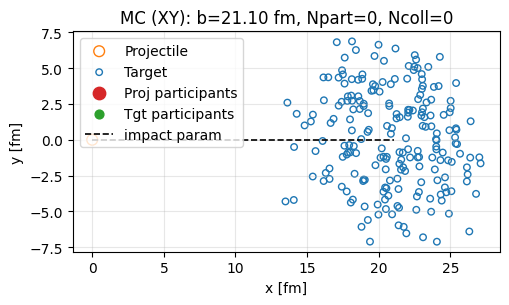

NameError: name 'plot_mc_event_xz' is not defined

In [8]:
ev_pPb = mc_pPb.simulate_one(b=np.sqrt(np.random.rand())*(2.5*mc_pPb.target_ws.R+5.0), keep_positions=True)
plot_mc_event(ev_pPb); plt.show()
plot_mc_event_xz(ev_pPb); plt.show()

## p+Pb: Centrality grids: optical vs MC

In [9]:
# bins = [(0,5),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80),(80,100)]
bins = [(0,20),(20,40),(40,60),(60,80),(80,100)]
centrality_grid_optical(opt_pPb, bins=bins, rmax=9.0); plt.show()
centrality_grid_mc(ev_pPb, res, bins=bins, smear=0.4, rmax=9.0, samples=1); plt.show()

[INFO] Finding b-edges for [0.  0.2 0.2 0.4 0.4 0.6 0.6 0.8 0.8 1. ] bins


KeyboardInterrupt: 

# d+Au @ 200 GeV RHIC

## Optical: d+Au @ 200 GeV RHIC

In [10]:
# RHIC d+Au (Au target, deuteron projectile)
opt_dAu = OpticalModel(system='dA', target='Au', energy_GeV=200, verbose=True)

print("σ_tot [fm^2]:", opt_dAu.sigma_tot(units='fm2'))
print("σ_tot [mb]  :", opt_dAu.sigma_tot(units='mb'))

# Use standard RHIC d+Au centrality bins
bins = [0,20,40,60,80,100]
rows_dAu_opt = centrality_table(opt_dAu, bins=bins, progress=True)
rows_dAu_opt[:2] + [rows_dAu_opt[-1]]  # peek

[INFO] Cached T_A(b) on 1200-point grid up to 19.11 fm
[INFO] Precomputed T_d^eff(d) on 1000 points up to 22.93 fm


σ_tot [fm^2]: 242.03546496767277


[INFO] Finding b-edges for [0.  0.2 0.4 0.6 0.8 1. ] bins


σ_tot [mb]  : 2420.3546496767276


100%|██████████████████████████████████████████████████████████████████████| 6/6 [00:49<00:00,  8.25s/it]


[{'cent': (0, 20),
  'b_range_fm': (0.0, 3.9253619545147242),
  'b_avg_fm': 2.6169346849717154,
  'Npart_avg': 15.843924070675156,
  'Ncoll_avg': 15.006209209400966},
 {'cent': (20, 40),
  'b_range_fm': (3.9253619545147242, 5.5514562919207044),
  'b_avg_fm': 4.784858140795251,
  'Npart_avg': 11.514469794805915,
  'Ncoll_avg': 10.026242179051787},
 {'cent': (0, 100),
  'b_range_fm': (0.0, 18.693241213626777),
  'b_avg_fm': 6.047099368475933,
  'Npart_avg': 7.543850854372524,
  'Ncoll_avg': 6.6060101816180765}]

In [11]:
b40_50 = [r for r in rows_dAu_opt if tuple(r["cent"])==(40,60)][0]["b_avg_fm"]

plot_TA_map(opt_dAu, rmax=10.0); plt.show()
plot_TpA_map(opt_dAu, b=b40_50, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_dAu, b=b40_50, rmax=10.0); plt.show()
plot_transverse_profiles(opt_dAu, b=b40_50, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_dAu, b=b40_50, x_half=10.0, z_half=10.0); plt.show()

AttributeError: 'OpticalModel' object has no attribute 'TA_xy'

## MC d+Au @ 200 GeV

In [12]:
mc_dAu = MonteCarloModel(system='dA', target='Au', energy_GeV=200)
res_dAu = mc_dAu.run(Nevents=12000, progress=True)
print(res_dAu.summary())
centrality_table_mc(res_dAu, bins=[0,20,40,60,80,100])

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:53<00:00, 224.18it/s]

Nevents=1862, <b>=5.671 fm, <N_part>=8.649, <N_coll>=7.781


[{'cent': (0, 20),
  'b_range_fm': (0.05564052013911087, 3.692552742059277),
  'b_avg_fm': 2.4367733318213585,
  'Npart_avg': 16.050938337801608,
  'Ncoll_avg': 15.672922252010723},
 {'cent': (20, 40),
  'b_range_fm': (3.696031193710126, 5.2330334144885144),
  'b_avg_fm': 4.49061483815978,
  'Npart_avg': 11.85752688172043,
  'Ncoll_avg': 11.11021505376344},
 {'cent': (40, 60),
  'b_range_fm': (5.2350769899841465, 6.326659192405384),
  'b_avg_fm': 5.794868687378093,
  'Npart_avg': 7.720430107526882,
  'Ncoll_avg': 6.669354838709677},
 {'cent': (60, 80),
  'b_range_fm': (6.326921626885462, 7.585972890525434),
  'b_avg_fm': 6.938889518017669,
  'Npart_avg': 4.720430107526882,
  'Ncoll_avg': 3.577956989247312},
 {'cent': (80, 100),
  'b_range_fm': (7.5903134961130805, 13.135766641616339),
  'b_avg_fm': 8.693768462228052,
  'Npart_avg': 2.8900804289544237,
  'Ncoll_avg': 1.8686327077747988},
 {'cent': (0, 100),
  'b_range_fm': (0.05564052013911087, 13.135766641616339),
  'b_avg_fm': 5.67086

## Single MC event (XY and XZ)

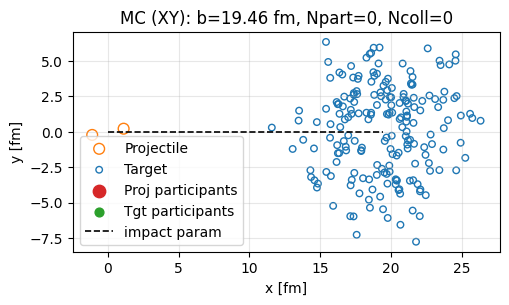

NameError: name 'plot_mc_event_xz' is not defined

In [13]:
ev_dAu = mc_dAu.simulate_one(b=np.sqrt(np.random.rand())*(2.5*mc_dAu.target_ws.R+5.0), keep_positions=True)
plot_mc_event(ev_dAu); plt.show()
plot_mc_event_xz(ev_dAu); plt.show()

## d+Au: Centrality grids: optical vs MC

In [14]:
# bins = [(0,5),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80),(80,100)]
bins = [(0,20),(20,40),(40,60),(60,80),(80,100)]
centrality_grid_optical(opt_dAu, bins=bins, rmax=9.0); plt.show()
centrality_grid_mc(ev_dAu, res, bins=bins, smear=0.4, rmax=9.0, samples=1); plt.show()

[INFO] Finding b-edges for [0.  0.2 0.2 0.4 0.4 0.6 0.6 0.8 0.8 1. ] bins


KeyboardInterrupt: 

# Pb + Pb @ 5.023 TeV LHC

## Optical: Pb+Pb @ 5.023 

In [15]:
# LHC Pb+Pb (Pb target, Pb projectile)
opt_PbPb = OpticalModel(system='AA', target='Pb', energy_GeV=5023, verbose=True)

print("σ_tot [fm^2]:", opt_PbPb.sigma_tot(units='fm2'))
print("σ_tot [mb]  :", opt_PbPb.sigma_tot(units='mb'))

# Use standard LHC Pb+Pb centrality bins
# bins = [0,10,20,30,40,50,60,70,80,90,100]
bins = [0,20,40,60,80,100]
rows_PbPb_opt = centrality_table(opt_PbPb, bins=bins, progress=True)
rows_PbPb_opt[:2] + [rows_PbPb_opt[-1]]  # peek

[INFO] Cached T_A(b) on 1200-point grid up to 19.47 fm
[INFO] Precomputed T_d^eff(d) on 1000 points up to 23.37 fm


σ_tot [fm^2]: 771.002069776046


[INFO] Finding b-edges for [0.  0.2 0.4 0.6 0.8 1. ] bins


σ_tot [mb]  : 7710.02069776046


100%|██████████████████████████████████████████████████████████████████████| 6/6 [00:42<00:00,  7.06s/it]


[{'cent': (0, 20),
  'b_range_fm': (0.0, 7.005962904239216),
  'b_avg_fm': 4.670690628241962,
  'Npart_avg': 354.8004075945136,
  'Ncoll_avg': 1321.2504529381695},
 {'cent': (20, 40),
  'b_range_fm': (7.005962904239216, 9.907927756657884),
  'b_avg_fm': 8.539931866490804,
  'Npart_avg': 234.1698272616238,
  'Ncoll_avg': 447.3748361560544},
 {'cent': (0, 100),
  'b_range_fm': (0.0, 19.46833946893421),
  'b_avg_fm': 10.492975868261984,
  'Npart_avg': 142.07060470653082,
  'Ncoll_avg': 380.97138973456936}]

In [16]:
b40_60 = [r for r in rows_PbPb_opt if tuple(r["cent"])==(40,60)][0]["b_avg_fm"]

plot_TA_map(opt_PbPb, rmax=10.0); plt.show()
plot_TAA_map(opt_PbPb, b=b40_60, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_PbPb, b=b40_60, rmax=10.0); plt.show()
plot_transverse_profiles(opt_PbPb, b=b40_60, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_PbPb, b=b40_60, x_half=10.0, z_half=10.0); plt.show()

AttributeError: 'OpticalModel' object has no attribute 'TA_xy'

## MC: Pb+Pb @ 5.023 

In [18]:
mc_PbPb = MonteCarloModel(system='AA', target='Pb', energy_GeV=5023)
res_PbPb = mc_PbPb.run(Nevents=5000, progress=True)
print(res_PbPb.summary())
centrality_table_mc(res_PbPb, bins=[0,20,40,60,80,100])

100%|████████████████████████████████████████████████████████████████| 5000/5000 [05:37<00:00, 14.79it/s]

Nevents=2645, <b>=10.247 fm, <N_part>=117.449, <N_coll>=405.978


[{'cent': (0, 20),
  'b_range_fm': (0.3004051233154155, 6.758512446051564),
  'b_avg_fm': 4.570526332391657,
  'Npart_avg': 313.062381852552,
  'Ncoll_avg': 1323.945179584121},
 {'cent': (20, 40),
  'b_range_fm': (6.770746168712838, 9.519653087087258),
  'b_avg_fm': 8.185557717400144,
  'Npart_avg': 168.89981096408317,
  'Ncoll_avg': 520.0359168241966},
 {'cent': (40, 60),
  'b_range_fm': (9.521683680112247, 11.820144805284121),
  'b_avg_fm': 10.733991211780904,
  'Npart_avg': 74.97164461247637,
  'Ncoll_avg': 150.01134215500946},
 {'cent': (60, 80),
  'b_range_fm': (11.82551866052671, 13.739780333500207),
  'b_avg_fm': 12.796928768657061,
  'Npart_avg': 24.640831758034025,
  'Ncoll_avg': 31.294896030245745},
 {'cent': (80, 100),
  'b_range_fm': (13.740355457754417, 19.7651429348248),
  'b_avg_fm': 14.947072325928175,
  'Npart_avg': 5.669187145557656,
  'Ncoll_avg': 4.604914933837429},
 {'cent': (0, 100),
  'b_range_fm': (0.3004051233154155, 19.7651429348248),
  'b_avg_fm': 10.24681527

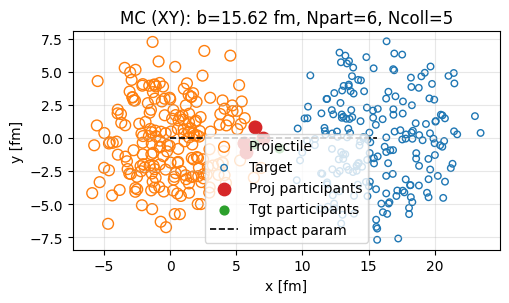

NameError: name 'plot_mc_event_xz' is not defined

In [19]:
ev_PbPb = mc_PbPb.simulate_one(b=np.sqrt(np.random.rand())*(2.5*mc_PbPb.target_ws.R+5.0), keep_positions=True)
plot_mc_event(ev_PbPb); plt.show()
plot_mc_event_xz(ev_PbPb); plt.show()

# Au + Au @ 200 GeV RHIC

## Optical: Au+Au @ 200 GeV

In [20]:
# RHIC uAu (AuAu target, projectile)
opt_AuAu = OpticalModel(system='AA', target='Au', energy_GeV=200, verbose=True)

print("σ_tot [fm^2]:", opt_AuAu.sigma_tot(units='fm2'))
print("σ_tot [mb]  :", opt_AuAu.sigma_tot(units='mb'))

# Use standard RHIC AuAu centrality bins
# bins = [0,10,20,30,40,50,60,70,80,90,100]
bins = [0,20,40,60,80,100]
rows_AuAu_opt = centrality_table(opt_AuAu, bins=bins, progress=True)
rows_AuAu_opt[:2] + [rows_AuAu_opt[-1]]  # peek

[INFO] Cached T_A(b) on 1200-point grid up to 19.11 fm
[INFO] Precomputed T_d^eff(d) on 1000 points up to 22.93 fm


σ_tot [fm^2]: 703.6609200715802


[INFO] Finding b-edges for [0.  0.2 0.4 0.6 0.8 1. ] bins


σ_tot [mb]  : 7036.609200715802


100%|██████████████████████████████████████████████████████████████████████| 6/6 [00:41<00:00,  6.87s/it]


[{'cent': (0, 20),
  'b_range_fm': (0.0, 6.693014677706393),
  'b_avg_fm': 4.4620563022013044,
  'Npart_avg': 323.38885446023215,
  'Ncoll_avg': 777.7315236552366},
 {'cent': (20, 40),
  'b_range_fm': (6.693014677706393, 9.46535213037457),
  'b_avg_fm': 8.15846302789443,
  'Npart_avg': 200.47785048572734,
  'Ncoll_avg': 280.38091498190704},
 {'cent': (0, 100),
  'b_range_fm': (0.0, 19.099812887564553),
  'b_avg_fm': 10.02859876948616,
  'Npart_avg': 125.42085910937148,
  'Ncoll_avg': 231.03851689687312}]

In [22]:
b40_60 = [r for r in rows_AuAu_opt if tuple(r["cent"])==(40,60)][0]["b_avg_fm"]

plot_TA_map(opt_AuAu, rmax=10.0); plt.show()
plot_TAA_map(opt_AuAu, b=b40_60, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_AuAu, b=b40_60, rmax=10.0); plt.show()
plot_transverse_profiles(opt_AuAu, b=b40_60, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_AuAu, b=b40_60, x_half=10.0, z_half=10.0); plt.show()

AttributeError: 'OpticalModel' object has no attribute 'TA_xy'

## MC: Au+Au @ 200 GeV

In [23]:
mc_AuAu = MonteCarloModel(system='AA', target='Au', energy_GeV=200)
res_AuAu = mc_AuAu.run(Nevents=5000, progress=True)
print(res_AuAu.summary())
centrality_table_mc(res_AuAu, bins=[0,20,40,60,80,100])

100%|████████████████████████████████████████████████████████████████| 5000/5000 [05:23<00:00, 15.44it/s]

Nevents=2476, <b>=9.900 fm, <N_part>=100.836, <N_coll>=239.432


[{'cent': (0, 20),
  'b_range_fm': (0.27609401866439576, 6.5510089514369625),
  'b_avg_fm': 4.3823668027591305,
  'Npart_avg': 278.46868686868686,
  'Ncoll_avg': 780.7979797979798},
 {'cent': (20, 40),
  'b_range_fm': (6.5513199220049145, 9.299923914768351),
  'b_avg_fm': 7.9837987752386566,
  'Npart_avg': 141.4989898989899,
  'Ncoll_avg': 301.5353535353535},
 {'cent': (40, 60),
  'b_range_fm': (9.301517540901981, 11.488319898361354),
  'b_avg_fm': 10.447091112864564,
  'Npart_avg': 59.686868686868685,
  'Ncoll_avg': 90.85656565656565},
 {'cent': (60, 80),
  'b_range_fm': (11.488720828706779, 13.105935121698968),
  'b_avg_fm': 12.333157077610377,
  'Npart_avg': 19.646464646464647,
  'Ncoll_avg': 20.696969696969695},
 {'cent': (80, 100),
  'b_range_fm': (13.108816778385432, 18.2798278364864),
  'b_avg_fm': 14.347047004286386,
  'Npart_avg': 5.070564516129032,
  'Ncoll_avg': 3.747983870967742},
 {'cent': (0, 100),
  'b_range_fm': (0.27609401866439576, 18.2798278364864),
  'b_avg_fm': 9.9

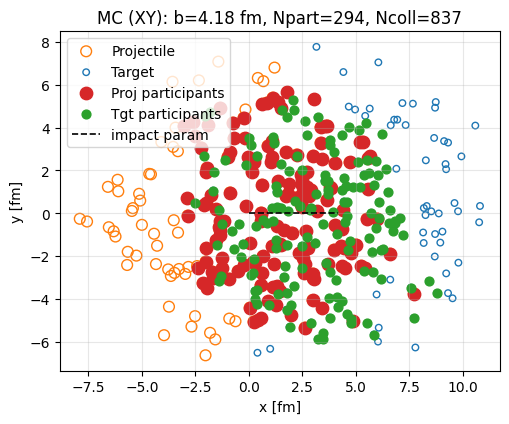

NameError: name 'plot_mc_event_xz' is not defined

In [24]:
ev_AuAu = mc_AuAu.simulate_one(b=np.sqrt(np.random.rand())*(2.5*mc_AuAu.target_ws.R+5.0), keep_positions=True)
plot_mc_event(ev_AuAu); plt.show()
plot_mc_event_xz(ev_AuAu); plt.show()

# The End -- Thank you! -- Sabin Thapa (sthapa3@kent.edu).